# Pneumonia Image Classification Project

## Part I: Data Understanding

Importing relevant packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
from mlxtend.plotting import plot_confusion_matrix

In [2]:
path = '../imageclassification_pneumonia_deeplearning/chest_xray/chest_xray'

train_folder = path + '/train/'
test_folder  = path + '/test/'
val_folder   = path + '/val/'

train_normal = train_folder + 'NORMAL/'
train_pneumonia   = train_folder + 'PNEUMONIA/'
# We can then take our training folder and and set the paths to each class. In this case, we have two classes: The normal images and the pneumonia images. If we want to visualize images that are specifically "normal" or "pneumonia", then we will create a variable that contains the path to these images for later reference.

pneumonia_images   = glob(train_pneumonia + "*.jpeg")
normal_images = glob(train_normal + "*.jpeg")
# Now that we have split the training folder into "normal" and "pneumonia", we can pull all of the images out of each class. The images in this dataset are all jpeg images, so for each path we will add .jpeg at the end to make sure we are pulling out the images. The reason for this is because we want to get a visual of our data.

def show_imgs(num_of_imgs):
    
    for img in range(num_of_imgs):
        pneu_pic   = np.asarray(plt.imread(pneumonia_images[img]))
        normal_pic = np.asarray(plt.imread(normal_images[img]))

        fig = plt.figure(figsize= (15,15))

        normal_plot = fig.add_subplot(1,2,1)
        plt.imshow(normal_pic, cmap='gray')
        normal_plot.set_title('Normal')
        plt.axis('off')

        pneu_plot = fig.add_subplot(1, 2, 2)
        plt.imshow(pneu_pic, cmap='gray')
        pneu_plot.set_title('Pneumonia')
        plt.axis('off')
    
        plt.show()

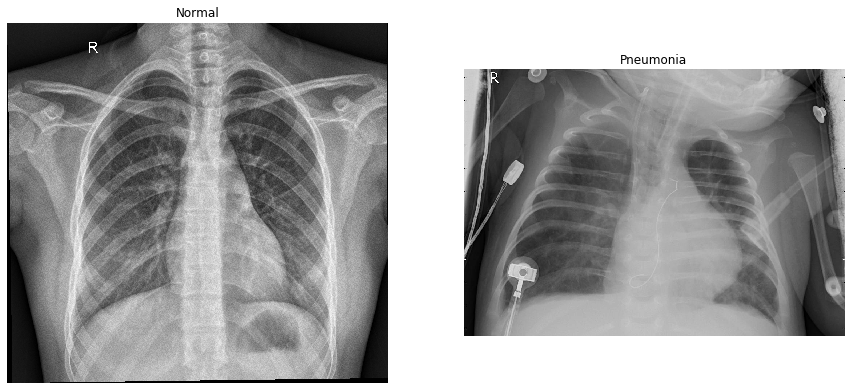

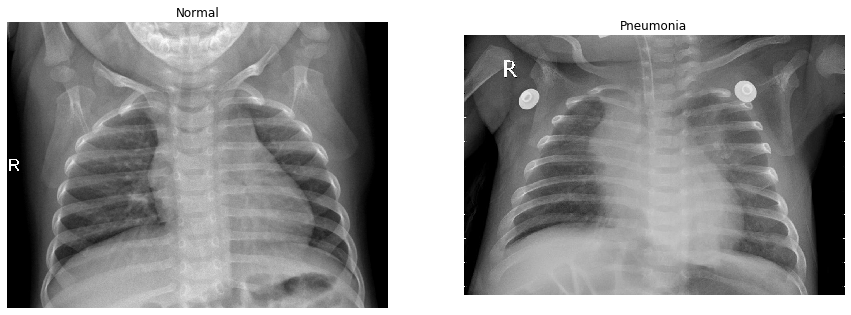

In [3]:
show_imgs(2)

In [4]:
print('Number of pneumonia training images:', len(pneumonia_images))
print('Number of normal training images:', len(normal_images))

Number of pneumonia training images: 3875
Number of normal training images: 1341


In [5]:
# roc_score
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
# visualisations
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    plt.figure()
    plt.plot(history['val_auroc'])
    plt.plot(history['auroc'])
    plt.legend(['val_auroc', 'auroc'])
    plt.title('roc_auc')
    plt.xlabel('epochs')
    plt.ylabel('roc_auc')
    plt.show()

In [6]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [7]:
train_v_datagen = ImageDataGenerator(
        rescale=1./255)
val_datagen = ImageDataGenerator(
        rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_v_datagen.flow_from_directory(
        train_folder,
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary',
        color_mode='grayscale',
        seed=123)

Found 5216 images belonging to 2 classes.


In [9]:
validation_generator = val_datagen.flow_from_directory(
        val_folder,
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary',
        color_mode='grayscale',
        seed=123)

Found 16 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory(test_folder,
        target_size= (200, 200),
        batch_size = 32,
        class_mode = 'binary',
        color_mode='grayscale',
        seed=123)

Found 624 images belonging to 2 classes.


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Activation, Dropout

from keras import optimizers

In [14]:
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), input_shape=(200,200,1)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 64)      640       
_________________________________________________________________
activation_5 (Activation)    (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        18464     
_________________________________________________________________
activation_6 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
__________

In [15]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', auroc])

In [89]:
model1.fit_generator(train_generator, 
                    steps_per_epoch = 6,
                    epochs = 10, 
                    validation_data = validation_generator,
                    class_weight=[0.4,0.6])

Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 0.1066 - acc: 0.9635 - auroc: 0.9991 - val_loss: 0.3740 - val_acc: 0.8125 - val_auroc: 0.9531
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.1313 - acc: 0.9583 - auroc: 0.9885 - val_loss: 0.3347 - val_acc: 0.9375 - val_auroc: 0.9375
Epoch 3/10
6/6 [==============================] - 9s 2s/step - loss: 0.1247 - acc: 0.9531 - auroc: 0.9791 - val_loss: 0.3757 - val_acc: 0.9375 - val_auroc: 0.9375
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 0.1141 - acc: 0.9635 - auroc: 0.9919 - val_loss: 0.5976 - val_acc: 0.7500 - val_auroc: 0.9531
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 0.1489 - acc: 0.9375 - auroc: 0.9867 - val_loss: 0.3190 - val_acc: 0.9375 - val_auroc: 0.9531
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 0.0900 - acc: 0.9583 - auroc: 0.9966 - val_loss: 0.9172 - val_acc: 0.6875 - val_auroc: 0.9219
Epoch 7/10
6/6 [=====

In [93]:
scores = model1.evaluate_generator(test_set)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model1.metrics_names[2], scores[2]*100))



acc: 74.20%

auroc: 92.77%


Tuning #1

In [53]:
model2 = Sequential()
model2.add(Conv2D(128, (3, 3), input_shape=(200,200,1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 198, 198, 128)     1280      
_________________________________________________________________
activation_35 (Activation)   (None, 198, 198, 128)     0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 97, 97, 32)        36896     
_________________________________________________________________
activation_36 (Activation)   (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 46, 46, 64)        18496     
__________

In [54]:
learning_rate = 0.1 
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [82]:
model2.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy', auroc])

In [83]:
model2.fit_generator(train_generator, 
                    steps_per_epoch = 6,
                    epochs = 8, 
                    validation_data = validation_generator)

Epoch 1/8
6/6 [==============================] - 18s 3s/step - loss: 0.4895 - acc: 0.8125 - auroc: 0.4912 - val_loss: 0.8966 - val_acc: 0.5000 - val_auroc: 0.5000
Epoch 2/8
6/6 [==============================] - 18s 3s/step - loss: 0.5059 - acc: 0.7969 - auroc: 0.4728 - val_loss: 0.9061 - val_acc: 0.5000 - val_auroc: 0.5000
Epoch 3/8
6/6 [==============================] - 19s 3s/step - loss: 0.5640 - acc: 0.7604 - auroc: 0.4548 - val_loss: 0.8941 - val_acc: 0.5000 - val_auroc: 0.5312
Epoch 4/8
6/6 [==============================] - 18s 3s/step - loss: 0.5362 - acc: 0.7708 - auroc: 0.5590 - val_loss: 0.8722 - val_acc: 0.5000 - val_auroc: 0.5312
Epoch 5/8
6/6 [==============================] - 19s 3s/step - loss: 0.5475 - acc: 0.7656 - auroc: 0.4626 - val_loss: 0.8628 - val_acc: 0.5000 - val_auroc: 0.5312
Epoch 6/8
6/6 [==============================] - 18s 3s/step - loss: 0.5863 - acc: 0.7344 - auroc: 0.4380 - val_loss: 0.8509 - val_acc: 0.5000 - val_auroc: 0.5469
Epoch 7/8
6/6 [=======

In [84]:
scores = model2.evaluate_generator(test_set)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model2.metrics_names[2], scores[2]*100))



acc: 62.50%

auroc: 70.90%


In [2]:
model3 = Sequential()
model3.add(Conv2D(256, (3, 3), input_shape=(200,200,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3)))
model2.add(Dropout(0.3))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))
model3.summary()

NameError: name 'Sequential' is not defined

In [102]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', auroc])

In [103]:
model3.fit_generator(train_generator, 
                    steps_per_epoch = 10,
                    epochs = 20, 
                    validation_data = validation_generator)

Epoch 1/20
10/10 [==============================] - 70s 7s/step - loss: 0.6009 - acc: 0.7312 - auroc: 0.5049 - val_loss: 0.8955 - val_acc: 0.5000 - val_auroc: 0.4375
Epoch 2/20
10/10 [==============================] - 72s 7s/step - loss: 0.6223 - acc: 0.7062 - auroc: 0.5153 - val_loss: 0.7659 - val_acc: 0.5000 - val_auroc: 0.5156
Epoch 3/20
10/10 [==============================] - 71s 7s/step - loss: 0.6050 - acc: 0.7219 - auroc: 0.5009 - val_loss: 0.7852 - val_acc: 0.5000 - val_auroc: 0.7188
Epoch 4/20
10/10 [==============================] - 71s 7s/step - loss: 0.5655 - acc: 0.7000 - auroc: 0.7763 - val_loss: 0.6891 - val_acc: 0.5000 - val_auroc: 0.7812
Epoch 5/20
10/10 [==============================] - 71s 7s/step - loss: 0.4120 - acc: 0.7312 - auroc: 0.9345 - val_loss: 0.9333 - val_acc: 0.6250 - val_auroc: 0.8125
Epoch 6/20
10/10 [==============================] - 71s 7s/step - loss: 0.3762 - acc: 0.8500 - auroc: 0.8929 - val_loss: 0.7237 - val_acc: 0.6250 - val_auroc: 0.8438
Epoc

In [104]:
scores = model3.evaluate_generator(test_set)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model3.metrics_names[2], scores[2]*100))



acc: 73.88%

auroc: 90.16%


In [1]:
probabilities = model3.predict_generator(generator=test_set)

y_true = test_set.classes

y_pred = probabilities > 0.5

font = {
'family': 'Times New Roman',
'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), show_normed=False)

NameError: name 'model3' is not defined

In [73]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_true, probabilities)


In [74]:
prevalence = 0.01

In [75]:
TPc = 400
FPc = 50
TNc = 0
FNc = 1000

#https://erj.ersjournals.com/content/erj/10/7/1530.full.pdf

In [76]:
m = (1-prevalence)/prevalence * (FPc-TNc)/(FNc-TPc)
m

8.25

In [77]:
fm_list = tpr_test-(m*fpr_test)
list(zip(fm_list.tolist(), thresholds_test.tolist()))

[(0.0, 1.9998118877410889),
 (0.002564102564102564, 0.9998118281364441),
 (-0.06794871794871796, 0.9997274279594421),
 (-0.05769230769230771, 0.9994989633560181),
 (-0.09294871794871795, 0.9994968175888062),
 (-0.09038461538461538, 0.9992951154708862),
 (-0.12564102564102567, 0.9992117881774902),
 (-0.11025641025641028, 0.9990078806877136),
 (-0.14551282051282052, 0.9990044236183167),
 (-0.14294871794871797, 0.9989334940910339),
 (-0.1782051282051282, 0.9989264607429504),
 (-0.17307692307692307, 0.9987725615501404),
 (-0.24358974358974364, 0.998723566532135),
 (-0.2384615384615385, 0.9985761642456055),
 (-0.27371794871794874, 0.9985201954841614),
 (-0.2634615384615385, 0.9984487295150757),
 (-0.29871794871794877, 0.9983677268028259),
 (-0.29615384615384616, 0.9982863068580627),
 (-0.3314102564102564, 0.9981946349143982),
 (-0.32884615384615384, 0.9981873631477356),
 (-0.39935897435897433, 0.9981468915939331),
 (-0.3967948717948718, 0.9980869293212891),
 (-0.43205128205128207, 0.9980625

In [78]:
probs_list = probabilities

my_results =[]
for x in probs_list:
    if x>0.08779523521661758:
        my_results.append(1)
    else:
        my_results.append(0)
my_results

confusion = []
for i, real in enumerate(y_true.tolist()):
    if my_results[i] == real:
        if my_results[i] == 0:
            confusion.append("TN")
        else:
            confusion.append("TP")
    else:
        if my_results[i] == 0:
            confusion.append("FN")
        else:
            confusion.append("FP")
        
pd.Series(confusion).value_counts()



TP    387
FP    231
FN      3
TN      3
dtype: int64

In [79]:
confusion_matrix(y_true.tolist(), my_results)


array([[  3, 231],
       [  3, 387]])

In [ ]:
model.save_weights('first_try.h5')

## Stuff

In [ ]:
# sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True

In [ ]:
# # Intitialise your NN
# model = Sequential()
# # Add a convolutional layer
# model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(200,200,3),activation='relu'))
# # Add a pooling layer
# model.add(MaxPool2D(pool_size=(2,2),strides=2))
# # Add a flattening layer
# model.add(Flatten())
# # Add a dense layer suitable for our problem
# model.add(Dense(1,activation='sigmoid'))
# # Compile your CNN
# model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
# # Show summary and compare with your partner
# model.summary()

In [ ]:
# model.fit_generator(train_generator,
#                          steps_per_epoch = 5,
#                          epochs = 5,
#                          validation_data = validation_generator)

In [ ]:
scores = model.evaluate_generator(test_set)


In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# model = Sequential()

# #add model layers
# model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(200,200,3)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.2))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))

# #compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

In [ ]:
# model_train = model.fit_generator(train_generator,
#                          steps_per_epoch = 5,
#                          epochs = 5,
#                          validation_data = validation_generator)